##MODELO SUPERVISIONADO DE CLASSIFIAÇÃO DO TEMPO

Dataset:https://www.kaggle.com/datasets/muthuj7/weather-dataset

Importação de Bibliotecas

In [ ]:
# Bibliotecas principais para manipulação, visualização e modelagem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Carregamento e Visualização dos Dados Iniciais

In [ ]:
#Carregando o dataset

df_chuva = pd.read_csv('/content/weatherHistory.csv', encoding = 'latin')
# Visualização inicial
df_chuva.info()
print('---------------------------------------------------------------------------------------------------------------------------------------')
df_chuva.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
---------------------------------------------------------------------

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Análise Exploratória de Dados (AED)

In [ ]:
df_chuva.info()
df_chuva.isnull().sum()
df_chuva.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


np.int64(24)

In [ ]:
df_chuva.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month
0,2006-03-31 22:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,3
1,2006-03-31 23:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,3
2,2006-04-01 00:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4
3,2006-04-01 01:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4
4,2006-04-01 02:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4


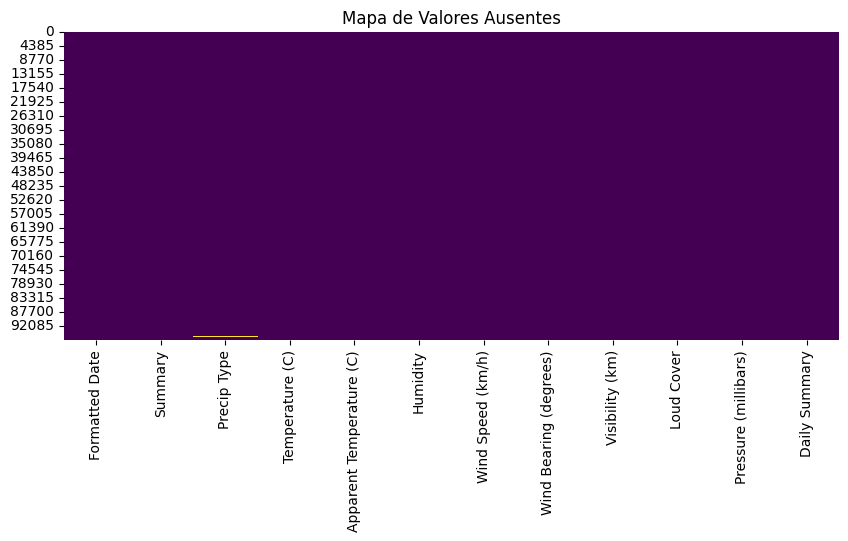

In [ ]:
# Distribuição de valores nulos
plt.figure(figsize=(10,4))
sns.heatmap(df_chuva.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Valores Ausentes")
plt.show()


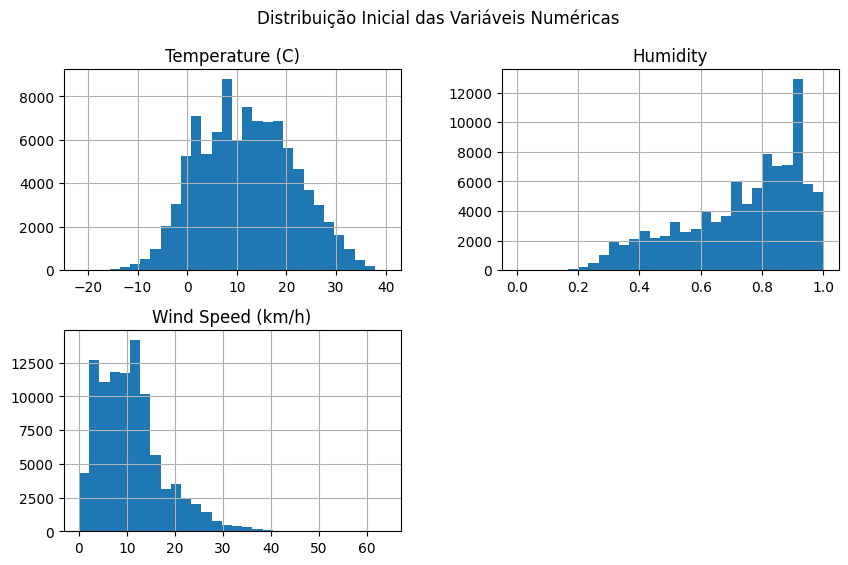

In [ ]:
# Distribuição de variáveis numéricas
df_chuva[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']].hist(bins=30, figsize=(10,6))
plt.suptitle("Distribuição Inicial das Variáveis Numéricas")
plt.show()

In [ ]:
#Tipos de clima e resumos disponíveis
print(df_chuva['Summary'].value_counts().head(10))
print(df_chuva['Daily Summary'].value_counts().head(10))

Summary
Partly Cloudy               31733
Mostly Cloudy               28094
Overcast                    16597
Clear                       10890
Foggy                        7148
Breezy and Overcast           528
Breezy and Mostly Cloudy      516
Breezy and Partly Cloudy      386
Dry and Partly Cloudy          86
Windy and Partly Cloudy        67
Name: count, dtype: int64
Daily Summary
Mostly cloudy throughout the day.                                  20085
Partly cloudy throughout the day.                                   9981
Partly cloudy until night.                                          6169
Partly cloudy starting in the morning.                              5184
Foggy in the morning.                                               4201
Foggy starting overnight continuing until morning.                  3576
Partly cloudy until evening.                                        3288
Mostly cloudy until night.                                          3095
Overcast throughout the day.

/tmp/ipython-input-7-3480971739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='Daily Summary', y='Visibility (km)', palette='Set3')


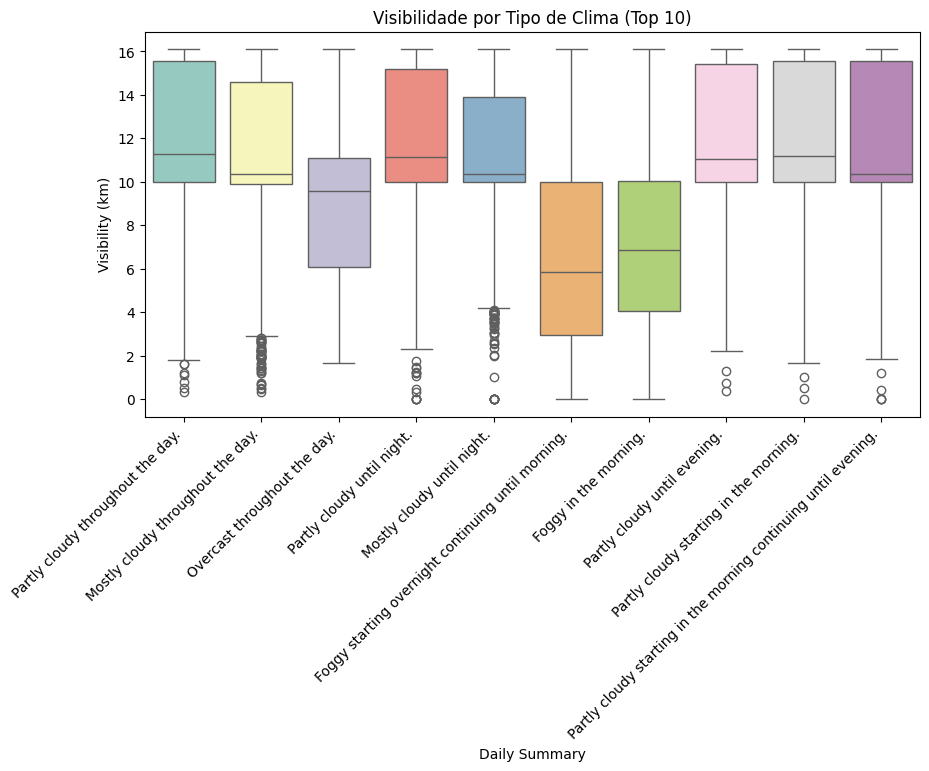

In [ ]:
#Distribuição da visibilidade para os 10 tipos de clima mais frequentes (Daily Summary)
plt.figure(figsize=(10,5))
top_10_climas = df_chuva['Daily Summary'].value_counts().nlargest(10).index
df_top = df_chuva[df_chuva['Daily Summary'].isin(top_10_climas)]

sns.boxplot(data=df_top, x='Daily Summary', y='Visibility (km)', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Visibilidade por Tipo de Clima (Top 10)')
plt.show()

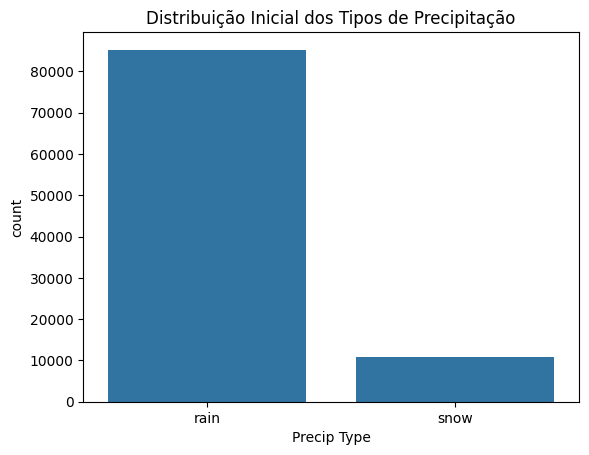

In [ ]:
# Proporção de tipos de precipitação
sns.countplot(data=df_chuva, x='Precip Type')
plt.title("Distribuição Inicial dos Tipos de Precipitação")
plt.show()

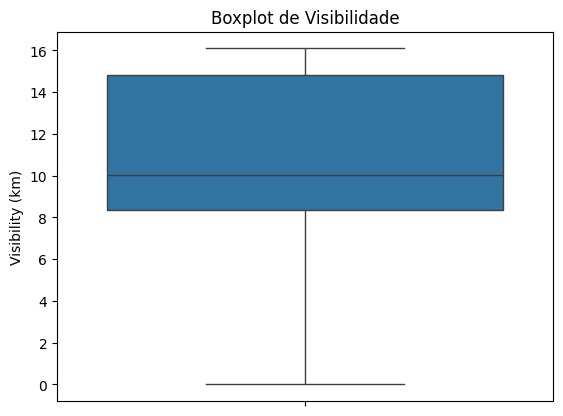

In [ ]:
#  Dados inválidos, outliers e inconsistências
sns.boxplot(data=df_chuva, y='Visibility (km)')
plt.title("Boxplot de Visibilidade")
plt.show()

Number of rows with invalid dates: 0


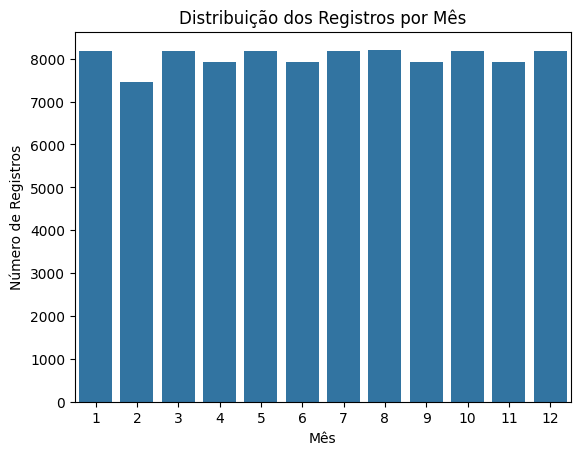

In [ ]:
# Converter a coluna 'Formatted Date' para datetime, tratando timezones
df_chuva['Formatted Date'] = pd.to_datetime(df_chuva['Formatted Date'], errors='coerce', utc=True)

# Remover timezone para datetime naive (sem timezone)
df_chuva['Formatted Date'] = df_chuva['Formatted Date'].dt.tz_localize(None)

# Verificar quantas linhas ficaram com data inválida (NaT)
invalid_dates = df_chuva[df_chuva['Formatted Date'].isna()]
print(f"Number of rows with invalid dates: {len(invalid_dates)}")

# Remover linhas com datas inválidas
df_chuva.dropna(subset=['Formatted Date'], inplace=True)

# Extrair o mês da data para análise
df_chuva['month'] = df_chuva['Formatted Date'].dt.month

# Plotar a distribuição dos registros por mês
sns.countplot(x='month', data=df_chuva)
plt.title("Distribuição dos Registros por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Registros")
plt.show()

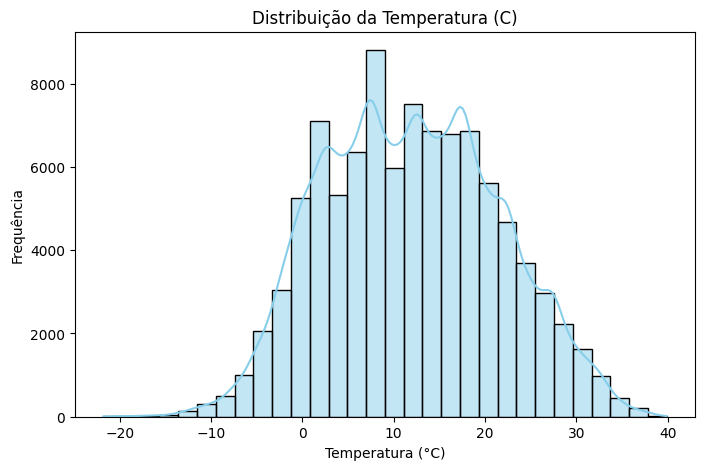

In [ ]:
# Visuzalização da distribuição da temperatura
plt.figure(figsize=(8,5))
sns.histplot(df_chuva['Temperature (C)'], kde=True, bins=30, color='skyblue')
plt.title('Distribuição da Temperatura (C)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.show()

/tmp/ipython-input-12-4220369125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_chuva, x='Precip Type', y='Humidity', palette='Set2')


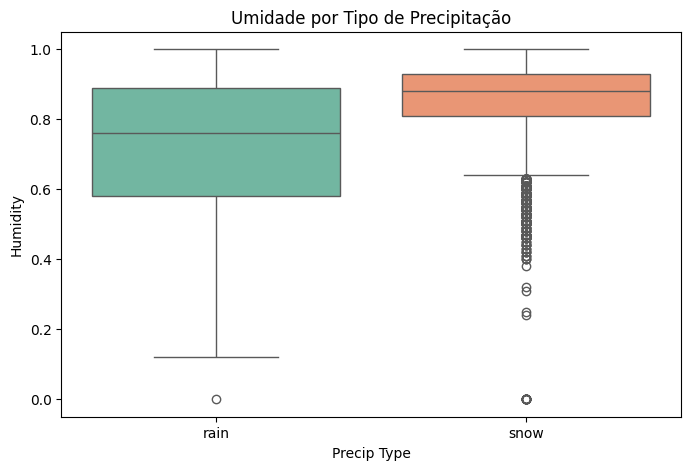

In [ ]:
#Distribuição da Umidade para cada tipo de precipitação
plt.figure(figsize=(8,5))
sns.boxplot(data=df_chuva, x='Precip Type', y='Humidity', palette='Set2')
plt.title('Umidade por Tipo de Precipitação')
plt.show()

Tratamento dos Dados

In [ ]:
# Selecionar colunas relevantes
df_chuva_tratado = df_chuva[[
    'Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
    'Humidity', 'Wind Speed (km/h)', 'Visibility (km)',
    'Pressure (millibars)', 'Daily Summary'
]].copy()

In [ ]:
# Converter "Formatted Date" para datetime e extrair componentes de data
if 'Formatted Date' in df_chuva_tratado.columns:
    df_chuva_tratado['Formatted Date'] = pd.to_datetime(df_chuva_tratado['Formatted Date'], errors='coerce', utc=True)
    df_chuva_tratado['Dia'] = df_chuva_tratado['Formatted Date'].dt.day
    df_chuva_tratado['Mês'] = df_chuva_tratado['Formatted Date'].dt.month
    df_chuva_tratado['Ano'] = df_chuva_tratado['Formatted Date'].dt.year
    df_chuva_tratado.drop(columns='Formatted Date', inplace=True)

In [ ]:
# Arredondar variáveis numéricas
for col in ['Temperature (C)', 'Wind Speed (km/h)', 'Visibility (km)']:
    if col in df_chuva_tratado.columns:
        df_chuva_tratado[col] = df_chuva_tratado[col].round(2)

In [ ]:
# Remover valores ausentes em 'Precip Type'
df_chuva_tratado.dropna(subset=['Precip Type'], inplace=True)

In [ ]:
# Reduzir "Daily Summary" para top 10 categorias + "outros"
top_10_daily = df_chuva_tratado['Daily Summary'].value_counts().nlargest(10).index

df_chuva_tratado['Daily Summary'] = df_chuva_tratado['Daily Summary'].where(
    df_chuva_tratado['Daily Summary'].isin(top_10_daily), 'outros'
)

# Separar features e target
x = df_chuva_tratado.drop('Precip Type', axis=1).copy()
y = df_chuva_tratado['Precip Type'].copy()

# Codificar colunas categóricas
le_summary = LabelEncoder()
x['Summary'] = le_summary.fit_transform(x['Summary'].astype(str))

le_daily_summary = LabelEncoder()
x['Daily Summary'] = le_daily_summary.fit_transform(x['Daily Summary'].astype(str))

In [2]:
# Balanceamento dos dados de teste
df_test = pd.DataFrame(x_test, columns=x_train.columns)
min_class_size = y_test.value_counts().min()
sample_size = min(1000, min_class_size)

# Amostragem com índice preservado
df_test_bal = (
    df_test.groupby(y_test, group_keys=False)
           .apply(lambda x: x.sample(n=sample_size, random_state=42))
)

# Adiciona target com base no índice original
df_test_bal['Precip Type'] = y_test.loc[df_test_bal.index].values

# Agora reseta índice para evitar problemas posteriores
df_test_bal = df_test_bal.reset_index(drop=True)

# Separa X e y
x_test_bal = df_test_bal.drop('Precip Type', axis=1)
y_test_bal = df_test_bal['Precip Type']

NameError: name 'pd' is not defined

Divisão dos Dados e Escalonamento

In [ ]:
# Dividir treino/teste com estratificação
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((76748, 10), (19188, 10), (76748,), (19188,))

Treinamento do Modelo

In [ ]:
# Treinamento do modelo com profundidade limitada
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Avaliação do Modelo


Relatório de Classificação (dados balanceados):
              precision    recall  f1-score   support

        rain       1.00      1.00      1.00      1000
        snow       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Acurácia: 1.0


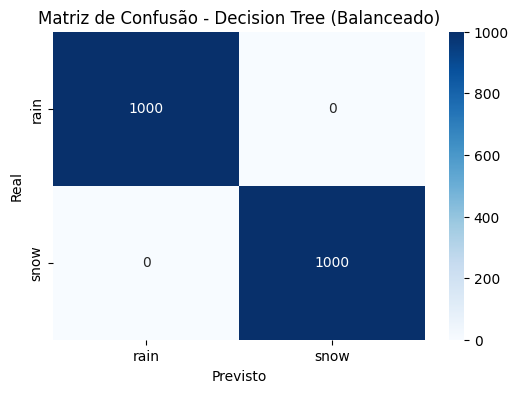

Validação Cruzada - Acurácias: [1. 1. 1. 1. 1.]
Média: 1.0


In [ ]:
# Predição e avaliação
y_pred = model.predict(x_test_bal)

print("\nRelatório de Classificação (dados balanceados):")
print(classification_report(y_test_bal, y_pred))
print("Acurácia:", accuracy_score(y_test_bal, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bal, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Decision Tree (Balanceado)')
plt.show()

# Validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')

print("Validação Cruzada - Acurácias:", scores)
print("Média:", scores.mean())
